In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from data_process import ItemDataset, createTrainDataloader
from model_train import trainModel, plotProcess
from model_test import testModel

# 1. 模型

## 1.1. 配置超参数

In [3]:
class Config:
    def __init__(self, model_name):
        self.device = "cuda" if torch.cuda.is_available() else "cpu" # device to use
        self.learning_rate = 0.001 # 学习率
        self.momentum = 0.90 # 动量
        self.batch_size = 64 # 更新频率
        self.number_of_epoches = 150 # 训练的回合数
        self.early_stopping_epoches = 50 # 模型如果连续多个回合没有改善则停止
        self.save_dir = model_name # 模型保存名称
        self.first_hidden_dimension = 256 # 网络的第一层隐藏层的维度
        self.second_hidden_dimension = 32 # 网络的第二层隐藏层的维度
        self.input_dimension = 17 # 输入层的维度
        self.output_dimension = 1 # 输出层的维度

## 1.2. 构建网络模型

In [21]:
class Model(nn.Module):
    def __init__(self, class_Config):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(class_Config.input_dimension, class_Config.first_hidden_dimension)
        self.fc2 = nn.Linear(class_Config.first_hidden_dimension, class_Config.second_hidden_dimension)
        self.fc3 = nn.Linear(class_Config.second_hidden_dimension, class_Config.output_dimension)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

# 2. 训练

## 2.1. 训练模型

In [13]:
# 定义数据集
config = Config("FFNN") # 创建配置类
dataset_file_path = "./data/input/training_samples/TrainingSamples.pkl"
train_dataset = ItemDataset(dataset_file_path)
train_loader, validation_loader = createTrainDataloader(config, train_dataset)

# 定义模型、损失函数和优化器
model = Model(config) # 创建模型
model.to(config.device) # 将模型放到设备上
criterion = nn.BCELoss() # 损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=config.learning_rate, momentum=config.momentum) # 定义随机梯度下降优化器

In [5]:
trainModel(config, train_loader, validation_loader, model, optimizer, criterion)

Start training...
Epoch: 1, train_loss: 0.688052, train_accuracy: 0.526420, validation_loss: 0.677470, validation_accuracy: 0.567045
Epoch: 2, train_loss: 0.660960, train_accuracy: 0.694396, validation_loss: 0.636265, validation_accuracy: 0.737810
Epoch: 3, train_loss: 0.595455, train_accuracy: 0.773115, validation_loss: 0.544580, validation_accuracy: 0.806302
Epoch: 4, train_loss: 0.492523, train_accuracy: 0.804365, validation_loss: 0.445060, validation_accuracy: 0.813843
Epoch: 5, train_loss: 0.418994, train_accuracy: 0.820119, validation_loss: 0.395565, validation_accuracy: 0.828616
Epoch: 6, train_loss: 0.384741, train_accuracy: 0.830294, validation_loss: 0.370597, validation_accuracy: 0.836364
Epoch: 7, train_loss: 0.364124, train_accuracy: 0.838223, validation_loss: 0.353598, validation_accuracy: 0.841012
Epoch: 8, train_loss: 0.347711, train_accuracy: 0.845971, validation_loss: 0.338744, validation_accuracy: 0.849587
Epoch: 9, train_loss: 0.334469, train_accuracy: 0.851834, vali

## 2.2. 绘制训练过程

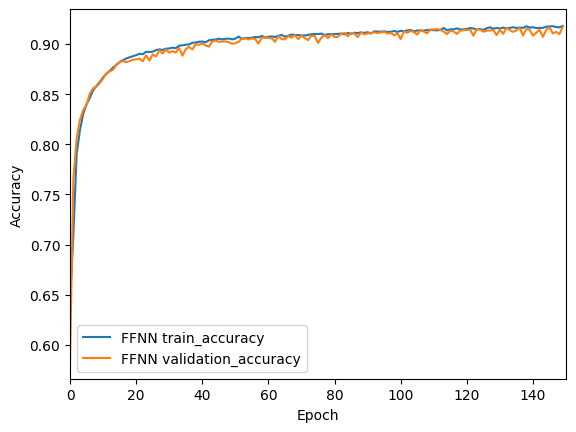

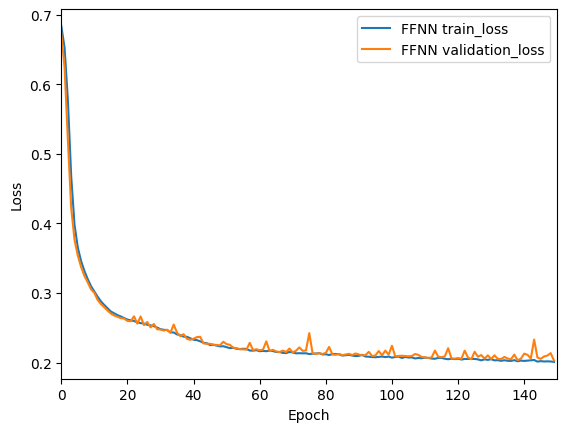

In [4]:
config = Config("FFNN") # 创建配置类
plotProcess(config) # 画出训练过程的图像

# 3. 测试

In [14]:
testModel(config, dataset_file_path = "./data/input/testing_samples/HybridClasses.pkl")

Loading the model...
test_loss: 0.129, test_accuracy: 0.954
[[20092   755]
 [ 1146 19701]]
true_positive_ratio: 0.9638, true_negative_ratio: 0.9450


In [15]:
testModel(config, dataset_file_path = "./data/input/testing_samples/PackingClass2.pkl")

Loading the model...
test_loss: 0.244, test_accuracy: 0.895
[[5554  940]
 [ 342 5422]]
true_positive_ratio: 0.8553, true_negative_ratio: 0.9407


In [16]:
testModel(config, dataset_file_path = "./data/input/testing_samples/PackingClass3.pkl")

Loading the model...
test_loss: 0.177, test_accuracy: 0.928
[[4854  133]
 [ 584 4403]]
true_positive_ratio: 0.9733, true_negative_ratio: 0.8829


In [17]:
testModel(config, dataset_file_path = "./data/input/testing_samples/PackingClass4.pkl")

Loading the model...
test_loss: 0.270, test_accuracy: 0.910
[[208   2]
 [ 36 174]]
true_positive_ratio: 0.9905, true_negative_ratio: 0.8286


In [18]:
testModel(config, dataset_file_path = "./data/input/testing_samples/PackingClass5.pkl")

Loading the model...
test_loss: 0.004, test_accuracy: 1.000
[[62726     8]
 [    0     0]]
true_positive_ratio: 0.9999, true_negative_ratio: nan


d:\MyProjects\PythonProject\feasibility-predictor\model_test.py:64: RuntimeWarning: invalid value encountered in scalar divide
  true_negative_ratio = confusion_matrix(labels, outputs)[1][1] / (confusion_matrix(labels, outputs)[1][0] + confusion_matrix(labels, outputs)[1][1]) # 计算真负率
